In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import os.path
from pathlib import Path
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 6
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.25
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.major.pad'] = 2

plt.rcParams['ytick.major.width'] = 0.25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.major.pad'] = 2
plt.rcParams['ytick.major.pad'] = 2

plt.rcParams['axes.labelpad'] = 2

In [3]:
fileIn = pd.read_excel('../data/Fig1/DLS_inputs.xlsx')
ftype = '_z_score_'

In [4]:
rews = pd.DataFrame()

peaks = pd.DataFrame()
for a,b in fileIn.iterrows():
    file = b['mouse']+'-' +str(b['date'])+'-'+str(b['time'])
    output = file + '_' + (b['output'])
    path = ('../data/Fig1/photometryTraces/'+ output)
    for c in ['right', 'left']: 
        df = pd.DataFrame()
        if b['protocol'] == 'reward':
            try: 
                rew = pd.read_hdf(Path(path+'/PtAB_10555_'+c+ftype+c+'.h5'))
            
                rews = pd.concat([rews, rew['mean']], axis = 1, ignore_index = True)
        
            
                new_row = pd.DataFrame({'rews':rew[(rew['timestamps'] < 1)&(rew['timestamps'] > 0)]['mean'].max(), 'mouse':b['mouse'], 'date':b['date'], 'hemi':c}, index=[0])
                peaks = pd.concat([new_row,peaks.loc[:]]).reset_index(drop=True)
            except: 
                continue

rews['timestamps'] = rew['timestamps']

rews_melt = pd.melt(rews, id_vars=['timestamps'])   

rews['average'] = rews.iloc[:,0:-1].mean(axis=1)

In [5]:
peaks['ID'] = peaks['mouse']+'_'+peaks['hemi']
temp = peaks.groupby('ID').mean(numeric_only = True)
temp = pd.melt(temp)
temp = temp[temp['variable'] != 'date']

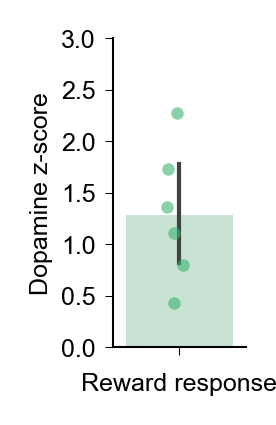

In [6]:
fix, ax = plt.subplots(figsize = (0.9,1.4), dpi = 300)
sns.barplot(temp, x = 'variable', y = 'value', legend = False, errorbar = ('ci', 95), alpha = 0.3, color = 'mediumSeaGreen', err_kws = {'linewidth': 1})
sns.stripplot(temp, x = 'variable', y = 'value', legend = False, size = 3, jitter = 0.1, color = 'mediumSeaGreen', alpha = 0.6)

plt.xticks([0], [''], fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Reward response', fontsize = 6)
#plt.ylabel('dF/F (%)')
plt.ylabel(r'Dopamine z-score', fontsize = 6)
plt.ylim(0, 3)

sns.despine()
plt.tight_layout()
plt.savefig('../figOutputs/fig1-1_reward.pdf', dpi = 300, bbox_inches = 'tight')

In [7]:
print('rew:', temp['value'].mean(), "+/-", temp['value'].sem())
print(sns.utils.ci(sns.algorithms.bootstrap(temp['value'])))

rew: 1.2813744626732337 +/- 0.27040870951803364
[0.81740039 1.77518538]


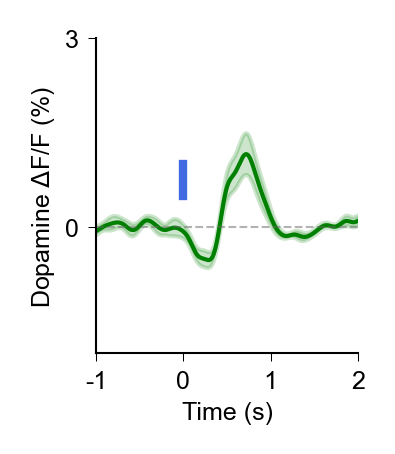

In [8]:
peaks = pd.DataFrame()
for a,b in fileIn[fileIn['mouse'] == 'Ch-25'].iterrows():
    file = b['mouse']+'-' +str(b['date'])+'-'+str(b['time'])
    output = file + '_' + (b['output'])
    path = ('../data/Fig1/photometryTraces/'+ output)
    for c in ['right', 'left']: 
        df = pd.DataFrame()
        if b['protocol'] == 'reward':
            try: 
                rew = pd.read_hdf(Path(path+'/PtAB_10555_'+c+'_dff_+'+c+'.h5'))
                rews = pd.concat([rews, rew['mean']], axis = 1, ignore_index = True)
            except: 
                continue

rews['timestamps'] = rew['timestamps']
rews_melt = pd.melt(rews, id_vars=['timestamps'])   


fig, ax = plt.subplots(figsize = (1.2,1.4), sharey = True, dpi = 300)
sns.lineplot(rews_melt, x = 'timestamps', y = 'value', errorbar = ('se'), n_boot = 1000, color = 'green', linewidth = 1)
ax.set_xlim(-1,2)
ax.set_ylabel(r'Dopamine $\Delta$F/F (%)', fontsize = 6)
ax.set_xlabel('Time (s)', fontsize = 6)
ax.set_ylim(-2, 3)
ax.set_yticks([0,3])
ax.set_yticklabels([0,3], fontsize = 6)
ax.set_xticks([-1, 0,1,2])
ax.set_xticklabels([-1, 0,1,2], fontsize = 6)
ax.axhline(0, ls = '--', color = '0.4', alpha = 0.5, lw = 0.5)

ax.plot([0,0], [0.5,1], lw = 2, color = 'royalblue')

sns.despine()
plt.tight_layout(pad = 0.5)
plt.savefig('../figOutputs/fig1-1_DLS_rewardTrace.pdf', dpi = 300, bbox_inches = 'tight')

In [9]:
sTime = rews_melt.groupby('timestamps').mean('value').idxmax()
sMax = rews_melt.groupby('timestamps').mean('value').max()

sSEM = rews_melt[(rews_melt['timestamps'] > sTime[0]-0.1)&(rews_melt['timestamps'] < sTime[0]+0.1)]['value'].sem()


In [10]:
print('Rew:', sMax[0], ' +/- ' , sSEM , ' @ ', sTime[0])

Rew: 1.15619  +/-  0.021069475  @  0.7191544
